# Matrix Factorization

Matrix factorization is a class of collaborative filtering algorithms and is a method of hybrid recommender system. These algorithms work by decomposing the user-item interaction matrix into the product of 2 lower dimensionality rectangular matrices.

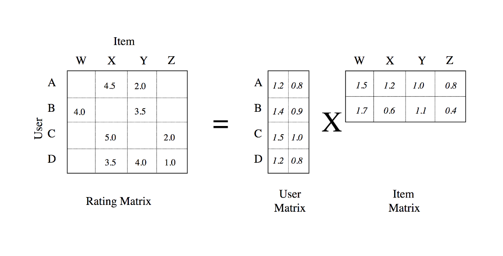

*More on this here -> [Wiki](https://en.wikipedia.org/wiki/Matrix_factorization_(recommender_systems))*
This algorithm is particularly useful when you have to derive characteristics of user & item purely based on their interactions. So if you want to predict if a user will like a particular movie you've got to look at his past interactions with similar movies to understand whether he will like this movie or not and how he would rate it.

*Further info on [Matrix Factorization](https://machinelearningmastery.com/introduction-to-matrix-decompositions-for-machine-learning/)*


**Here, we would use Movie-lens dataset to recommend similar movies based on ratings.**

# Import packages & dataset

In [ ]:
from collections import defaultdict #acts just like dictionary except for the fact that it never raises a KeyError. It displays a default value for the Key that doesn't exist. Useful as many movies wouldn't have ratings as users did not watch them so this would avoid KeyErrors.
from surprise import SVD, Dataset #surprise is a scikit library used for recommendation systems

In [ ]:
import pandas as pd

from surprise.prediction_algorithms.matrix_factorization import SVD
from sklearn.model_selection import train_test_split
import surprise

In [ ]:
# Load movielens dataset.
data = Dataset.load_builtin('ml-100k')
data

In [ ]:
#We will use entire data into training set
trainset = data.build_full_trainset()
trainset.ur #ur - user ratings

User 0 has given a rating of 4.0 for movie no. 528. What if we would like to know the rating this User 0 will give to a movie that he hasn't watched. We will use Singular Value Decomposition to derive characteristics of this movie and user.

# Singular Value Decomposition
SVD is a matrix factorization technique that is usually used to reduce the no. of features of a dataset by reducing space dimensions from N to K

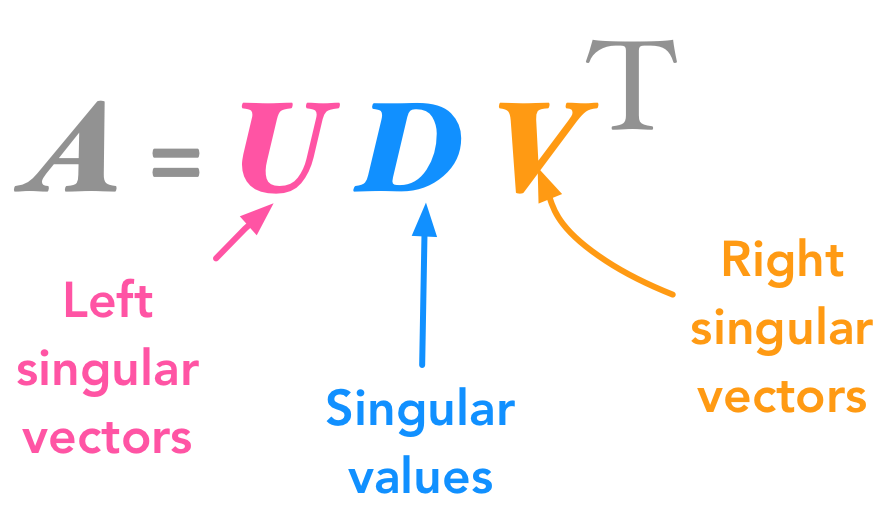

**What goes behind the scenes:**

Decompose Matrix into U,s, VT

In [ ]:
#Import packages for SVD
from numpy import array, diag, dot
from scipy.linalg import svd

#Define a sample matrix to be decomposed by SVD
A = array([[1,2,3],[4,5,6],[7,8,9]])
A

In [ ]:
#Applying SVD on A would output 3 parameters namely
U,s,VT = svd(A)
print("U = ",U) #Orthogonal matrix
print('************************************************')
print("S = ",s) #Singular values
print('************************************************')
print("VT = ", VT) #Transpose of Orthogonal matrix


In [ ]:
#Converting all singular values into diagonal matrix
sigma = diag(s)
print('Sigma = ',sigma)

The diagonal values in the Sigma matrix 's' are known as the singular values of the original matrix A. The columns of the U matrix are called the left-singular vectors of A, and the columns of V are called the right-singular vectors of A.

***For further info: [Machine Learning Mastery](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/#:~:text=The%20diagonal%20values%20in%20the,calculated%20via%20iterative%20numerical%20methods.)***

Now that we have decomposed A into U, s, VT. Let's reconstruct to form Matrix A 

In [ ]:
B = U.dot(sigma.dot(VT))
print(B)

Coming back to our dataset.

**Things to do:**
* Initialize and Fit SVD into trainset
* Create testset - all movies not available in trainset
* Predict ratings for movies in testset

In [ ]:
#Initialize and Fit SVD into trainset
algo = SVD()
algo.fit(trainset)

In [ ]:
# Create testset - all movies not available in trainset
testset = trainset.build_anti_testset()
testset

Ratings you see here 3.52986 are global mean ratings which is not a reliable metric. This is given to all those movies that have no rating. Next step we will use SVD algorithm to predict user ratings for these movies.

In [ ]:
#Predict ratings for movies in testset
pred = algo.test(testset)
pred

Above gives you a list of all movies not watched by User 196 and would be the ratings he would give.

was_impossible = False, means SVD was able to predict the rating given the data it had. It means predicting the rating wasn't impossible as we had some prior data. This would be particularly useful when a new movie never watched or a new user having no previous rating info, in such case it would be was_impossible: True

# Recommend a list of movies to a user

**Things to do:**
* Write a function that map predictions to each user
* Sort the predictions and retrieve top n ratings a user would rate a movie
* Finally recommend a list of movies to user

In [ ]:
def get_top_n_movies(pred, n):
    #Write a function that map predictions to each user
    top_n = defaultdict(list) #convert list into defaultdict which accomadates empty key values pair
    for uid, iid, true_r,est, _ in pred:#variable names to all features in predictions
        top_n[uid].append((iid,est))
        
    #Sort the predictions and retrieve n highest scores
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x:x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

n = 10
top_n = get_top_n_movies(pred,n)
top_n

In [ ]:
#Finally recommend a list of movies to user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

# Summary & Model deployment

This is how we derive/ predict ratings for a product just by understanding past interactions of that product with other users OR past interactions of a user with similar products. 

**Benefits:**
* You don't need to have features of user, products as this is purely based on ratings given

**Model deployment:**
You should first start with simple popularity based, content based recommender systems and gradually move towards matrix factorization based collaborative recommenders.